<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/gimseng/99-ML-Learning-Projects/blob/master/010/solution/knn_from_scratch.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter
from copy import deepcopy

In [2]:
# Sample data with (xp,yp) as positive-class coordinates and (xn,yn) as negative-class coordinates
#xp = [-1,0,4,6,7]
#yp = [-2,0,4,2,9]
#xn = [-3,1,2,4,6,4]
#yn = [-2,5,4,2,4,6]

xp=[]
yp=[]
xn=[]
yn=[]

data = [
    (-1,-2,'Positive'),
    (7,9,'Positive'),
    (0,0,'Positive'),
    (4,4,'Positive'),
    (6,2,'Positive'),
    (-3,-2,'Negative'),
    (1,5,'Negative'),
    (2,4,'Negative'),
    (4,2,'Negative'),
    (6,4,'Negative'),
    (4,6,'Negative'),
]

In [3]:
# Append data points in respective arrays for data plotting
for i in range(0,len(data)):
    if(data[i][2]=='Positive'):
        xp.append(data[i][0])
        yp.append(data[i][1])
    else: 
        xn.append(data[i][0])
        yn.append(data[i][1])
        
print(xp,yp,xn,yn)

[-1, 7, 0, 4, 6] [-2, 9, 0, 4, 2] [-3, 1, 2, 4, 6, 4] [-2, 5, 4, 2, 4, 6]


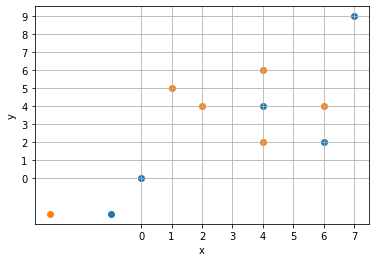

In [4]:
# Plot coordinates
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 10, 1))
ax.set_yticks(np.arange(0, 10, 1))
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(xp,yp)
plt.scatter(xn,yn)
plt.grid(True)
plt.show()

In [5]:
# calculates Euclidean distance from the point to be classified 
# to every other point and stores in a tuple.
def e_distance(x,y):
    obj_list=[]
    obj_list=deepcopy(data)
    for i in range(0,len(data)):
        obj_list[i] += (math.sqrt((x-data[i][0])**2 + (y-data[i][1])**2),)
    return obj_list

In [6]:
# function for calculating mode of data
def max_Count(vector):
    counts = Counter(x[2] for x in vector) 
    return counts.most_common(1)

In [7]:
# Provide test input for classification in the format 1 2 3 by giving space in between
(x1,y1,k) = map(int,input("Enter pts x,y and k: ").split(" "))

Enter pts x,y and k: 1 1 3


In [8]:
#sorts the list and finds mode of the first k tuples to classify point x1,y1
def KNN(x1,y1,k):
    print("\nPoint to be classified: ",str(x1) +","+ str(y1))
    print("\nvalue of k =",k)
    if(k>len(data)):
        print("\nNo. of neighbors exceeding no. of samples")
    vector = e_distance(x1,y1)
    vector = sorted(vector,key = lambda x:x[3])
    topk = vector[:k]
    print("\nTop",k,"tuples")
    print(topk)
    arr =[]
    arr = max_Count(topk)
    print("\nClassification is: ",arr[0][0])    

In [9]:
KNN(x1,y1,k)


Point to be classified:  1,1

value of k = 3

Top 3 tuples
[(0, 0, 'Positive', 1.4142135623730951), (2, 4, 'Negative', 3.1622776601683795), (4, 2, 'Negative', 3.1622776601683795)]

Classification is:  Negative
